In [1]:
from models import prepare_fashion_mnist, prepare_mnist, prepare_cifar10
from torchvision.utils import make_grid
import numpy as np
import matplotlib.pyplot as plt
n_sample = 64
data_dim = 784

In [2]:
train_datasets, train_loader, test_datasets, test_loader = prepare_fashion_mnist(batch_size=n_sample)

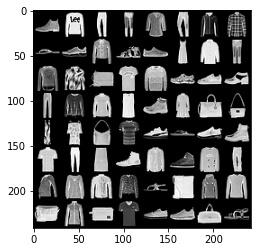

In [3]:
sample_images = next(iter(test_loader))[0]
npimg = np.transpose(make_grid(sample_images.view(n_sample, 1, 28, 28).data).numpy(), (1, 2, 0))
plt.imshow(npimg)

(60000, 784)

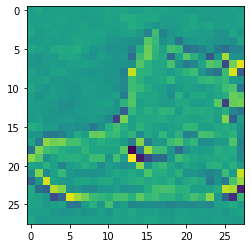

In [4]:
def zca_whitening_matrix(X):
    """
    Function to compute ZCA whitening matrix (aka Mahalanobis whitening).
    INPUT:  X: [N x M] matrix.
        Rows: Variables
        Columns: Observations
    OUTPUT: ZCAMatrix: [M x M] matrix
    """
    # Covariance matrix [column-wise variables]: Sigma = (X-mu)' * (X-mu) / N
    sigma = np.cov(X.T, rowvar=True) # [M x M]
    # Singular Value Decomposition. X = U * np.diag(S) * V
    U,S,V = np.linalg.svd(sigma)
        # U: [M x M] eigenvectors of sigma.
        # S: [M x 1] eigenvalues of sigma.
        # V: [M x M] transpose of U
    # Whitening constant: prevents division by zero
    epsilon = 1e-8
    # ZCA Whitening matrix: U * Lambda * U'
    ZCAMatrix = np.dot(U, np.dot(np.diag(1.0/np.sqrt(S + epsilon)), U.T)) # [M x M]
    return ZCAMatrix

data = train_datasets.data.view(-1, data_dim).numpy()
P = zca_whitening_matrix(data)
import matplotlib.pyplot as plt

plt.imshow(data[0].reshape(28, 28))

plt.imshow(np.dot(data, P).reshape((-1, 28, 28))[0])
data_white = np.dot(data, P).reshape((-1, data_dim))
data_white.shape

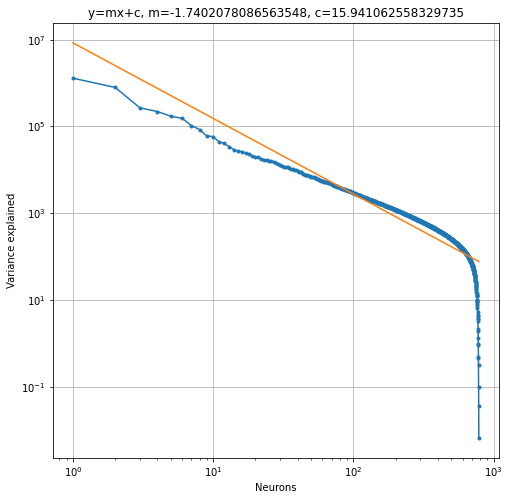

In [5]:
import sklearn
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(train_datasets.data.view(-1, 784).numpy(), P)

fig, ax = plt.subplots(figsize=(8, 8))
xx = np.arange(len(pca.explained_variance_)) + 1
ax.plot(xx, pca.explained_variance_, '.-')


ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Neurons')
ax.set_ylabel('Variance explained')
log_xx = np.log(xx)
yy = pca.explained_variance_
log_yy = np.log(yy)
m, c = np.linalg.lstsq(np.vstack([log_xx, np.ones(len(log_xx))]).T, log_yy, rcond=None)[0]
ax.set_title(f'y=mx+c, m={m}, c={c}')
ax.plot(xx, np.e**c * xx**m, label=f"log y= {m:.3} log x + {c:.3}")
ax.grid()

In [6]:
cum_var = pca.explained_variance_ratio_.cumsum()
th = 0.99
x_max = np.argmax(np.where(cum_var < th, cum_var, 0))
print(x_max)

457


In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
x_th = np.arange(x_max) + 1
y_th = pca.explained_variance_[:x_max]
log_x_th = np.log(x_th)
log_y_th = np.log(y_th)
m, c = np.linalg.lstsq(np.vstack([log_x_th, np.ones(len(log_x_th))]).T, log_y_th, rcond=None)[0]
ax.plot(xx, yy, ".-")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Neurons')
ax.set_ylabel('Variance explained')
ax.set_title(f'Effective dimension = {x_max}')
ax.plot(xx, np.e**c * xx**m, c="magenta", label="Fitting to 99% of variance")
ax.scatter([x_max], [np.e**c * x_max**m], c="red", marker="o", linewidths=3, label=f"a, n_max: {m:.3}, {x_max}", zorder=2.5)
ax.grid(visible=True)
ax.legend()

In [8]:
import sklearn
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(np.dot(train_datasets.data.view(-1, 784).numpy(), P))

fig, ax = plt.subplots(figsize=(8, 8))
xx = np.arange(len(pca.explained_variance_)) + 1


#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlabel('N')
ax.set_ylabel('Variance')
log_xx = np.log(xx)
yy = pca.explained_variance_ 
ax.plot(xx, yy, '.-')
log_yy = np.log(yy)
#ax.set_title(f'Effective dimension = {x_max}')
#ax.plot(xx, np.e**c * xx**m, label=f"log y= {m:.3} log x + {c:.3}")
#ax.legend()
ax.grid()

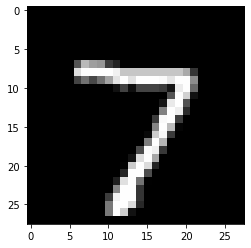

In [ ]:
plt.imshow(sample_images.view(-1, data_dim)[0].numpy().reshape(28, 28), cmap="gray")

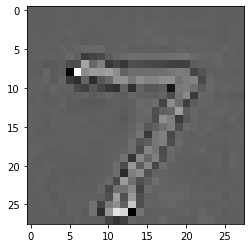

In [ ]:
import torch

np_white = np.dot(sample_images.view(-1, data_dim).numpy(), P)
plt.imshow(np_white[0].reshape((28,28)), cmap="gray")